1. Pick something else on Craigslist: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of EDA you'd do with it. I look at used cars below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/boo?purveyor=owner#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

2. Get your search results of interest and extract data from them, using code similar to what's below.

In [3]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [4]:
import re

brands = ['john', 'jon', 'triton', 'rinker', 'kayak', 'alumacraft', 'baja', 'canoe', 'pontoon', 'yamaha', 'crestliner', 'pelican', 'mariah']
data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})

3. Wrangle your data, do some EDA, and make some plots. Try to find some interesting relationships or stories to tell about your data.

In [8]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_boats.csv') # Save data in case of a disaster
df.head()

(29, 6)


,title,price,year,link,brand,age
0,wave armor drive on pwc and boat ports,2200,NaN,https://charlottesville.craigslist.org/boa/d/g...,missing,NaN
1,john boat 3 trolling motors and battery,800,NaN,https://charlottesville.craigslist.org/boa/d/l...,john,NaN
2,jon boat and vee bottom boat,200,NaN,https://charlottesville.craigslist.org/boa/d/a...,jon,NaN
3,14ft jon boat crestliner,2850,NaN,https://charlottesville.craigslist.org/boa/d/d...,jon,NaN
4,triton tr-175 fishing boat,6500,NaN,https://charlottesville.craigslist.org/boa/d/p...,triton,NaN


count       29.000000
mean      4491.034483
std       8125.771218
min          0.000000
25%        180.000000
50%        800.000000
75%       4300.000000
max      35000.000000
Name: price, dtype: float64


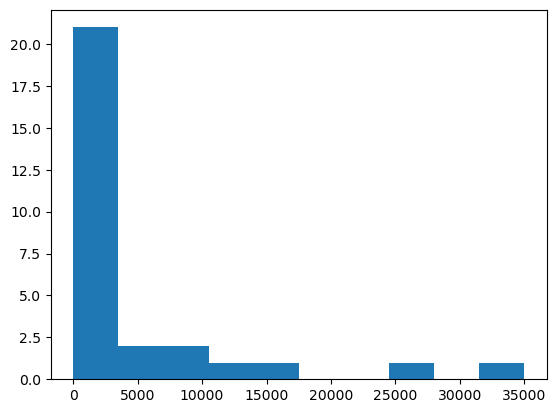

In [12]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

In [13]:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                         \
           count          mean          std      min       25%      50%   
brand                                                                     
alumacraft   1.0  35000.000000          NaN  35000.0  35000.00  35000.0   
baja         1.0  25000.000000          NaN  25000.0  25000.00  25000.0   
canoe        1.0    600.000000          NaN    600.0    600.00    600.0   
crestliner   1.0  14000.000000          NaN  14000.0  14000.00  14000.0   
john         1.0    800.000000          NaN    800.0    800.00    800.0   
jon          3.0   1283.333333  1389.544290    200.0    500.00    800.0   
kayak        8.0    416.750000   465.338817     40.0    153.75    200.0   
mariah       1.0   9500.000000          NaN   9500.0   9500.00   9500.0   
missing      5.0    831.200000  1001.069278      1.0    175.00    180.0   
pelican      1.0    200.000000          NaN    200.0    200.00    200.0   
pontoon      1.0   4300.000000          NaN   4300.0   4300.00   4300.0   
rinker       2.0   1250.000000  1767.766953      0.0    625.00   1250.0   
triton       1.0   6500.000000          NaN   6500.0   6500.00   6500.0   
yamaha       2.0  10250.000000   353.553391  10000.0  10125.00  10250.0   

                               
                 75%      max  
brand                          
alumacraft  35000.00  35000.0  
baja        25000.00  25000.0  
canoe         600.00    600.0  
crestliner  14000.00  14000.0  
john          800.00    800.0  
jon          1825.00   2850.0  
kayak         474.75   1300.0  
mariah       9500.00   9500.0  
missing      1600.00   2200.0  
pelican       200.00    200.0  
pontoon      4300.00   4300.0  
rinker       1875.00   2500.0  
triton       6500.00   6500.0  
yamaha      10375.00  10500.0